# **Starter Pack**

### **The Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [448]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# **DataFrame**

### **The DataFrame**

In [9]:
path = "/Users/amirsaccount/Desktop/ConcordiaBootcamp/Kaggledataset/accepted_2007_to_2018Q4.csv.gz"
df = pd.read_csv(path, low_memory=False, compression = "gzip")

In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(2260701, 151)

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [14]:
# Memory usage of 2.5+ GB... Now thats a big file! Of course it is! There are 2,260,701 rows in this dataset!!!

In [15]:
NaNCount = df.isna().sum()
NaNCount

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [16]:
# So quickly you can realize that not only is this dataset very large, but also filled with a lot of NaNs and unnecessary data that 
# won't be factored in calculating the score of an individual at risk of being charged off.

# As a result, one of the first steps is to drop columns that I wont need in the dataset. This phase will be called
# the data clean up phase which will involve dropping column(s) and removing the NaN values in all the rows of this dataset.

###**The Clean Up Phase**

In [17]:
# Since I know the total number of rows for this dataset is exactly 2,260,701; any columns with missing values close to the number of rows 
# will be dropped as there simply is not enough data.

In [18]:
column_groups = [list(df.columns[i:i+5]) for i in range(0, len(df.columns),5)]

for group in column_groups:
    NaNCount = df[group].isna().sum()
    print(NaNCount)

id                       0
member_id          2260701
loan_amnt               33
funded_amnt             33
funded_amnt_inv         33
dtype: int64
term           33
int_rate       33
installment    33
grade          33
sub_grade      33
dtype: int64
emp_title              167002
emp_length             146940
home_ownership             33
annual_inc                 37
verification_status        33
dtype: int64
issue_d             33
loan_status         33
pymnt_plan          33
url                 33
desc           2134634
dtype: int64
purpose          33
title         23358
zip_code         34
addr_state       33
dti            1744
dtype: int64
delinq_2yrs         62
earliest_cr_line    62
fico_range_low      33
fico_range_high     33
inq_last_6mths      63
dtype: int64
mths_since_last_delinq    1158535
mths_since_last_record    1901545
open_acc                       62
pub_rec                        62
revol_bal                      33
dtype: int64
revol_util             1835
total_

In [19]:
df_new = df.drop([
"member_id",
"emp_title",
"desc",
"mths_since_last_delinq",
"mths_since_last_record",
"next_pymnt_d",
"mths_since_last_major_derog",
"annual_inc_joint",
"dti_joint",
"mths_since_recent_bc_dlq",
"mths_since_recent_revol_delinq",
"verification_status_joint",
"revol_bal_joint",
"sec_app_fico_range_low",
"sec_app_fico_range_high",
"sec_app_earliest_cr_line",
"sec_app_inq_last_6mths",
"sec_app_mort_acc",
"sec_app_open_acc",
"sec_app_revol_util",
"sec_app_open_act_il",
"sec_app_num_rev_accts",
"sec_app_chargeoff_within_12_mths",
"sec_app_collections_12_mths_ex_med",
"sec_app_mths_since_last_major_derog",
"hardship_type",      
"hardship_reason",
"hardship_status",
"deferral_term",
"hardship_amount",
"hardship_start_date",
"hardship_end_date",
"payment_plan_start_date",
"hardship_length",
"hardship_dpd",
"hardship_loan_status",
"orig_projected_additional_accrued_interest",
"hardship_payoff_balance_amount",          
"hardship_last_payment_amount",                
"debt_settlement_flag_date",
"settlement_status",
"settlement_date",
"settlement_amount",
"settlement_percentage",
"settlement_term"], axis=1)

In [20]:
df_new.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [22]:
df_new.to_csv('/Users/amirsaccount/Desktop/ConcordiaBootcamp/Kaggledataset/my_dataset.csv',index = 'False')

In [23]:
# I am doing this to shrink the dataset more and save it into a new csv so if my colab crashes I dont have to reset with
# the same gigantic dataset.

In [82]:
df_capstone = pd.read_csv('/Users/amirsaccount/Desktop/ConcordiaBootcamp/Kaggledataset/my_dataset.csv')

In [83]:
selected_columns = [

"loan_amnt",
"emp_length",
"term",
"int_rate",
"installment",
"funded_amnt",
"grade",
"dti", # Debt To Income Ratio: 
"home_ownership",
"annual_inc",
"verification_status",
"purpose",
"all_util", # All utilization score: Where(1) >30% is bad and (0) <29% is good. 
"delinq_2yrs", # The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
"pub_rec", # Number of derogatory public records
"loan_status",
"fico_range_low", # Find the average between fico_range_low & fico_range_high
"fico_range_high",
"revol_util", # Revolving utilization score: Where(1) >30% is bad and (0) <29% is good.
"total_pymnt",
"collections_12_mths_ex_med", # Collections since 12 months not including medical debt: Where(1) >1.0 is bad and (0) <1.0 is good. 
"acc_now_delinq",# Delinquent accounts: Where(1) >1.0 is bad and (0) <1.0 is good. 
"tot_cur_bal",
"mort_acc", # Mortgage Account: Special Formula
"pub_rec_bankruptcies"] # Public record bankruptcies: Where(1) >1.0 is bad and (0) <1.0 is good. 

df_data = df_capstone[selected_columns]
df_data.head()

,loan_amnt,emp_length,term,int_rate,installment,funded_amnt,grade,dti,home_ownership,annual_inc,...,loan_status,fico_range_low,fico_range_high,revol_util,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,mort_acc,pub_rec_bankruptcies
0,3600.0,10+ years,36 months,13.99,123.03,3600.0,C,5.91,MORTGAGE,55000.0,...,Fully Paid,675.0,679.0,29.7,4421.723917,0.0,0.0,144904.0,1.0,0.0
1,24700.0,10+ years,36 months,11.99,820.28,24700.0,C,16.06,MORTGAGE,65000.0,...,Fully Paid,715.0,719.0,19.2,25679.660000,0.0,0.0,204396.0,4.0,0.0
2,20000.0,10+ years,60 months,10.78,432.66,20000.0,B,10.78,MORTGAGE,63000.0,...,Fully Paid,695.0,699.0,56.2,22705.924294,0.0,0.0,189699.0,5.0,0.0
3,35000.0,10+ years,60 months,14.85,829.90,35000.0,C,17.06,MORTGAGE,110000.0,...,Current,785.0,789.0,11.6,31464.010000,0.0,0.0,301500.0,1.0,0.0
4,10400.0,3 years,60 months,22.45,289.91,10400.0,F,25.37,MORTGAGE,104433.0,...,Fully Paid,695.0,699.0,64.5,11740.500000,0.0,0.0,331730.0,6.0,0.0


In [84]:
df_data['fico_range'] = (df_data['fico_range_low'] + df_data['fico_range_high']) / 2
df_data = df_data.drop(['fico_range_low', 'fico_range_high'], axis=1)

# Personally, I would like to take the average of the customers FICO score rather than their low and high end scores.

In [85]:
# In the following cells you will see that for "all_util", "revol_util", and "dti"; I took values between 0 to 100%. 
# The reason being some of these values (in the case of "dti") are between -1% to 999% which is mathematically improbable and must likely due to incorrect
# entries or lack of data. In other cases, its because in the case of "util" better known as "Utilization" anything above 100% I have considered outliers 
# and in the "loan world" already having 80% or higher is extremely bad anyways and the odds of having another loan approved is very, very, very unlikely.

In [86]:
df_data = df_data[df_data['all_util'].between(0, 100)]

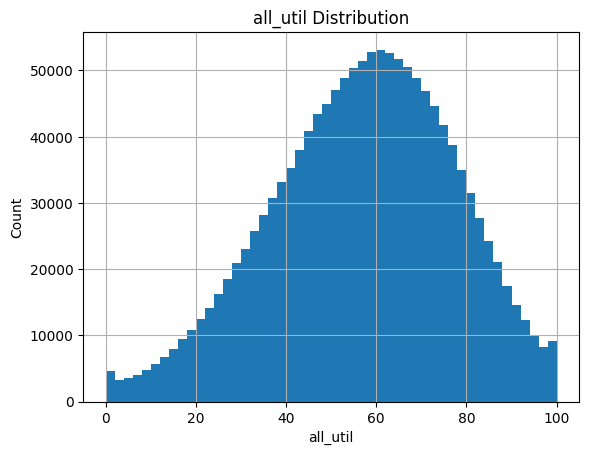

In [87]:
df_data.hist(column='all_util', bins=50)

plt.title('all_util Distribution')
plt.xlabel('all_util')
plt.ylabel('Count')

plt.show()

In [88]:
def utilization_checker(x):
    if pd.isna(x):
        return None
    rounded_x = round(x)
    if rounded_x >= 80:
        return "Extremely Risky"
    elif 60 <= rounded_x <= 79:
        return "Risky"
    elif 31 <= rounded_x <= 59:
        return "Moderate"
    elif rounded_x <= 30:
        return "Safe"
    else:
        return None

df_data['all_util'] = df_data['all_util'].apply(utilization_checker)

In [89]:
df_data = df_data[df_data['revol_util'].between(0, 100)]

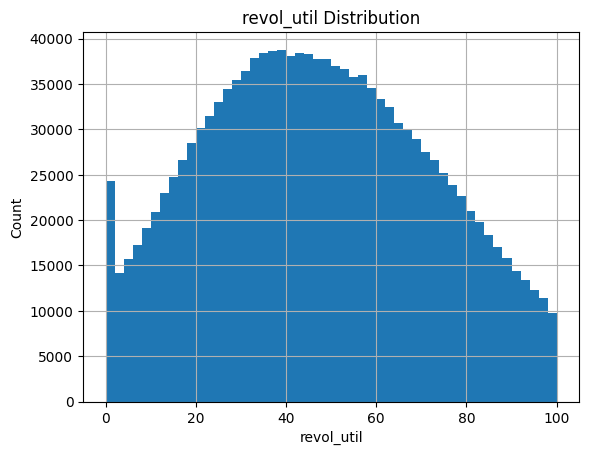

In [90]:
df_data.hist(column='revol_util', bins=50)

plt.title('revol_util Distribution')
plt.xlabel('revol_util')
plt.ylabel('Count')

plt.show()

In [91]:
def revolving_utilization_checker(x):
  if pd.isna(x):
    return None
  rounded_x = round(x)
  if rounded_x >= 80:
    return "Extremely Risky"
  elif 51 <= rounded_x <= 79:
        return "Risky"
  elif 30 <= rounded_x <= 50:
        return "Moderate"
  elif x <= 29:
        return "Safe"
  else:
    return None

df_data['revol_util'] = df_data['revol_util'].apply(revolving_utilization_checker)

In [92]:
df_data = df_data[df_data['dti'].between(0, 100)]

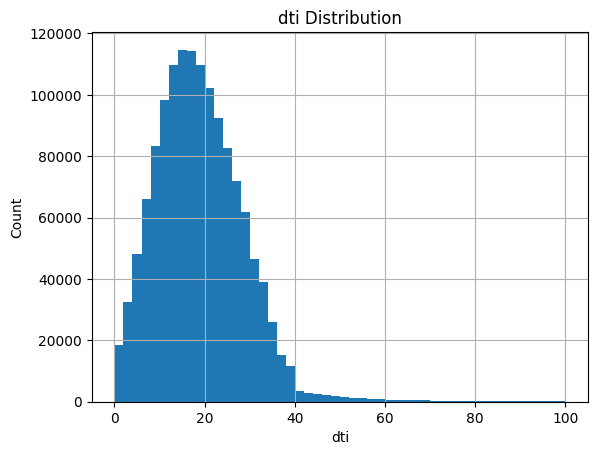

In [93]:
df_data.hist(column='dti', bins=50)

plt.title('dti Distribution')
plt.xlabel('dti')
plt.ylabel('Count')

plt.show()

In [94]:
def dti_checker(x):
  if pd.isna(x):
    return None
  rounded_x = round(x)
  if rounded_x >= 80:
    return "Extremely Risky"
  elif 40 <= rounded_x <= 79:
    return "Very Risky"
  elif 20 <= rounded_x <= 39:
    return "Moderate"
  elif rounded_x <= 19:
    return "Safe"
  else:
      return None

df_data['dti'] = df_data['dti'].apply(dti_checker)

In [96]:
NaNCount = df_data.isna().sum()
NaNCount

loan_amnt                         0
emp_length                    99816
term                              0
int_rate                          0
installment                       0
funded_amnt                       0
grade                             0
dti                               0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
all_util                          0
delinq_2yrs                       0
pub_rec                           0
loan_status                       0
revol_util                     7074
total_pymnt                       0
collections_12_mths_ex_med        0
acc_now_delinq                    0
tot_cur_bal                       0
mort_acc                          0
pub_rec_bankruptcies              0
fico_range                        0
dtype: int64

In [97]:
df_data = df_data.dropna()

In [98]:
NaNCount = df_data.isna().sum()
NaNCount

loan_amnt                     0
emp_length                    0
term                          0
int_rate                      0
installment                   0
funded_amnt                   0
grade                         0
dti                           0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
all_util                      0
delinq_2yrs                   0
pub_rec                       0
loan_status                   0
revol_util                    0
total_pymnt                   0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_cur_bal                   0
mort_acc                      0
pub_rec_bankruptcies          0
fico_range                    0
dtype: int64

In [99]:
df_data.dtypes

loan_amnt                     float64
emp_length                     object
term                           object
int_rate                      float64
installment                   float64
funded_amnt                   float64
grade                          object
dti                            object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
all_util                       object
delinq_2yrs                   float64
pub_rec                       float64
loan_status                    object
revol_util                     object
total_pymnt                   float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_cur_bal                   float64
mort_acc                      float64
pub_rec_bankruptcies          float64
fico_range                    float64
dtype: object

In [100]:
df_data = df_data[(df_data['loan_status'] == 'Fully Paid') | (df_data['loan_status'] == 'Charged Off')]

In [101]:
import re

In [102]:
def employment_length_float(s):
    pattern = r'\d+\.?\d*'
    matches = re.findall(pattern, s)
    if matches:
        return float(matches[0])
    else:
        return None

df_data['emp_length'] = df_data['emp_length'].apply(employment_length_float)

In [103]:
df_data['loan_status'] = df_data['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [104]:
df_data.dtypes

loan_amnt                     float64
emp_length                    float64
term                           object
int_rate                      float64
installment                   float64
funded_amnt                   float64
grade                          object
dti                            object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
all_util                       object
delinq_2yrs                   float64
pub_rec                       float64
loan_status                     int64
revol_util                     object
total_pymnt                   float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_cur_bal                   float64
mort_acc                      float64
pub_rec_bankruptcies          float64
fico_range                    float64
dtype: object

In [105]:
# I want to convert all my "oject" to "float64"

In [106]:
object_cols = df_data.select_dtypes(include=['object']).columns

for col in object_cols:
    dummy_df = pd.get_dummies(df_data[col], prefix=col)
    df_data = pd.concat([df_data, dummy_df], axis=1)

df_data.drop(object_cols, axis=1, inplace=True)

In [107]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489711 entries, 0 to 2260697
Data columns (total 58 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            489711 non-null  float64
 1   emp_length                           489711 non-null  float64
 2   int_rate                             489711 non-null  float64
 3   installment                          489711 non-null  float64
 4   funded_amnt                          489711 non-null  float64
 5   annual_inc                           489711 non-null  float64
 6   delinq_2yrs                          489711 non-null  float64
 7   pub_rec                              489711 non-null  float64
 8   loan_status                          489711 non-null  int64  
 9   total_pymnt                          489711 non-null  float64
 10  collections_12_mths_ex_med           489711 non-null  float64
 11  acc_now_deli

In [108]:
df_data.columns = df_data.columns.str.replace(' ', '_')

In [121]:
df_data.to_csv('/Users/amirsaccount/Desktop/ConcordiaBootcamp/my_final_dataset.csv',index = 'False')

### **The Working DataFrame**

In [122]:
df_final_data = pd.read_csv('/Users/amirsaccount/Desktop/ConcordiaBootcamp/my_final_dataset.csv')
del df_final_data['Unnamed: 0']

In [123]:
df_final_data.shape

(489711, 58)

In [124]:
df_final_data.columns

Index(['loan_amnt', 'emp_length', 'int_rate', 'installment', 'funded_amnt',
       'annual_inc', 'delinq_2yrs', 'pub_rec', 'loan_status', 'total_pymnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_cur_bal',
       'mort_acc', 'pub_rec_bankruptcies', 'fico_range', 'term__36_months',
       'term__60_months', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'dti_Extremely_Risky', 'dti_Moderate',
       'dti_Safe', 'dti_Very_Risky', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not_Verified',
       'verification_status_Source_Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_busine

### **The Data Exploration**

In [125]:
df_final_data = pd.read_csv('//Users/amirsaccount/Desktop/ConcordiaBootcamp/my_final_dataset.csv')
del df_final_data['Unnamed: 0']
df_final_data.head()

,loan_amnt,emp_length,int_rate,installment,funded_amnt,annual_inc,delinq_2yrs,pub_rec,loan_status,total_pymnt,...,purpose_vacation,purpose_wedding,all_util_Extremely_Risky,all_util_Moderate,all_util_Risky,all_util_Safe,revol_util_Extremely_Risky,revol_util_Moderate,revol_util_Risky,revol_util_Safe
0,3600.0,10.0,13.99,123.03,3600.0,55000.0,0.0,0.0,0,4421.723917,...,0,0,0,1,0,0,0,1,0,0
1,24700.0,10.0,11.99,820.28,24700.0,65000.0,1.0,0.0,0,25679.660000,...,0,0,0,0,0,1,0,0,0,1
2,20000.0,10.0,10.78,432.66,20000.0,63000.0,0.0,0.0,0,22705.924294,...,0,0,0,0,1,0,0,0,1,0
3,10400.0,3.0,22.45,289.91,10400.0,104433.0,1.0,0.0,0,11740.500000,...,0,0,0,0,1,0,0,0,1,0
4,11950.0,4.0,13.44,405.18,11950.0,34000.0,0.0,0.0,0,13708.948530,...,0,0,0,0,1,0,0,0,1,0


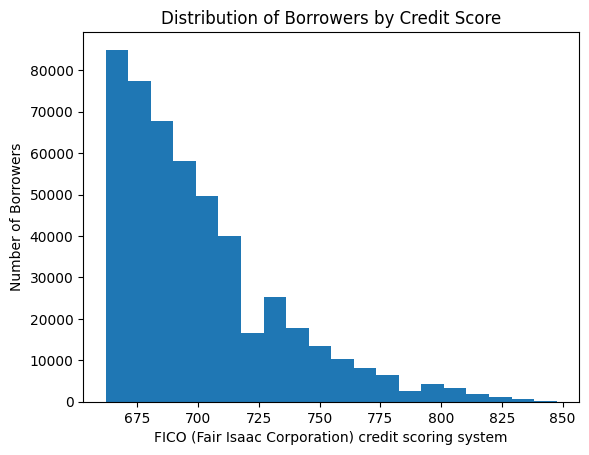

In [126]:
x = df_final_data[['fico_range']].values

plt.hist(x, bins=20)

plt.xlabel('FICO (Fair Isaac Corporation) credit scoring system')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Borrowers by Credit Score')

plt.show()

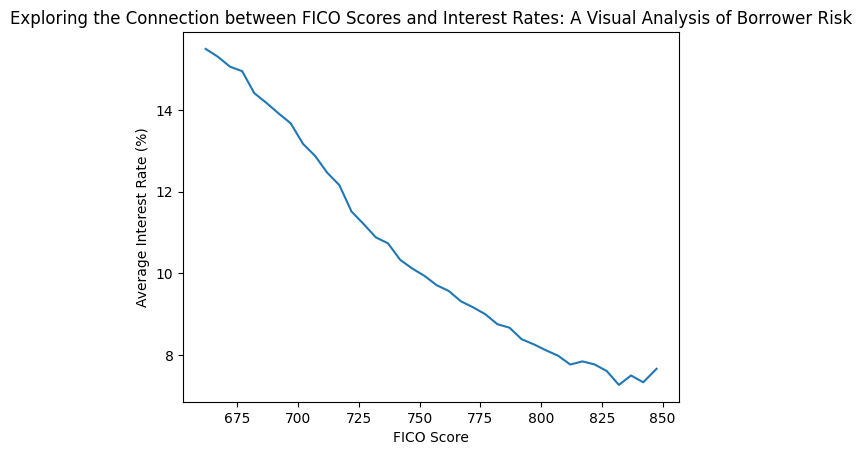

In [127]:
grouped_5 = df_final_data.groupby('fico_range')['int_rate'].mean()

plt.plot(grouped_5.index, grouped_5.values)

plt.xlabel('FICO Score')
plt.ylabel('Average Interest Rate (%)')
plt.title('Exploring the Connection between FICO Scores and Interest Rates: A Visual Analysis of Borrower Risk')

plt.show()

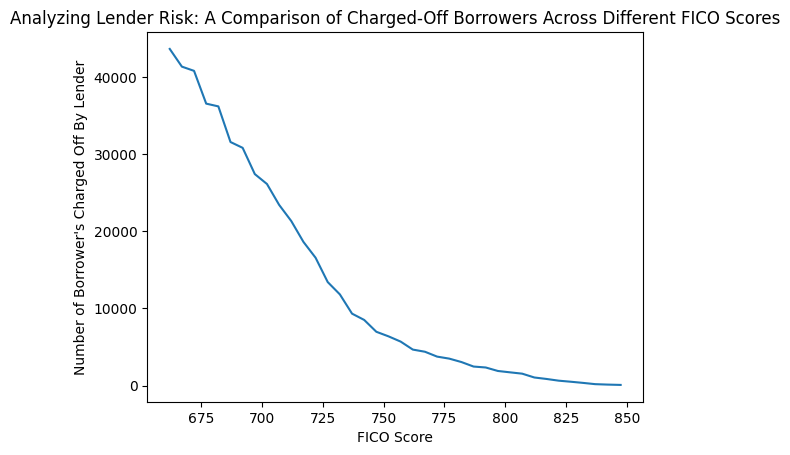

In [129]:
grouped_8 = df_final_data.groupby('fico_range')[['loan_status']].count()

plt.plot(grouped_8.index, grouped_8.values)

plt.xlabel('FICO Score')
plt.ylabel("Number of Borrower's Charged Off By Lender")
plt.title('Analyzing Lender Risk: A Comparison of Charged-Off Borrowers Across Different FICO Scores')

plt.show()

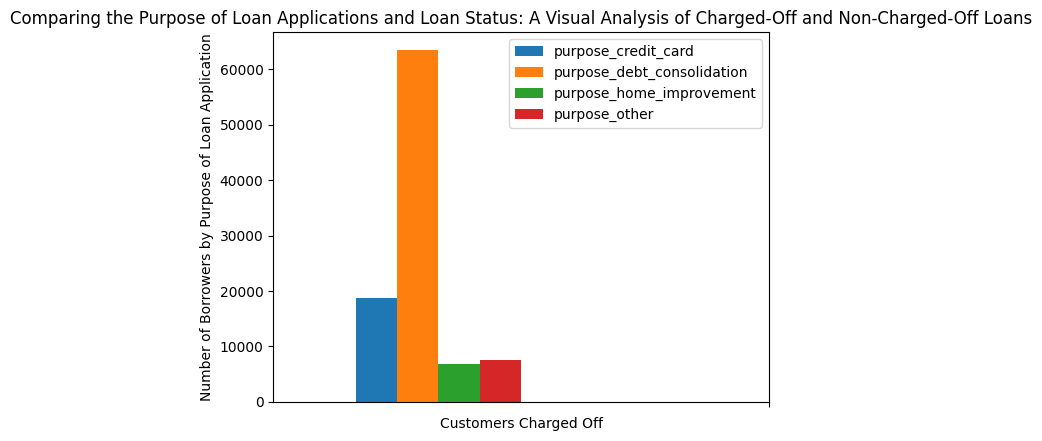

In [130]:
grouped_10 = df_final_data[df_final_data['loan_status'] == 1].groupby('loan_status')[['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_other']].sum()


grouped_10.plot.bar()
plt.xlabel('Customers Charged Off')
plt.ylabel('Number of Borrowers by Purpose of Loan Application')
plt.xticks([1], [''])
plt.title('Comparing the Purpose of Loan Applications and Loan Status: A Visual Analysis of Charged-Off and Non-Charged-Off Loans')
plt.show()

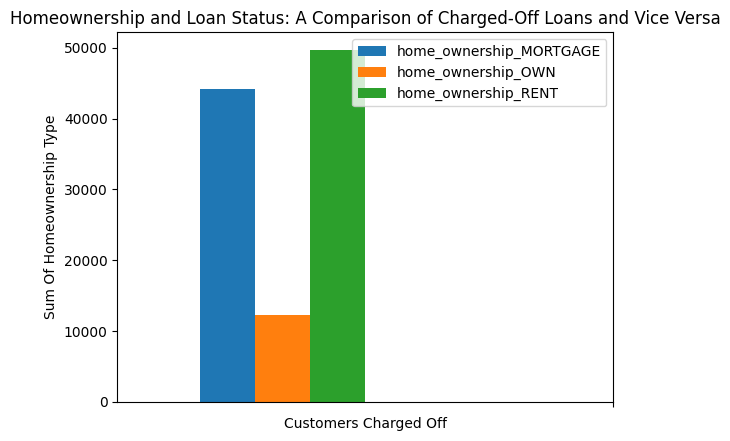

In [131]:
grouped_9 = df_final_data[df_final_data['loan_status'] == 1].groupby('loan_status')[['home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT']].sum()


grouped_9.plot.bar()
plt.xlabel('Customers Charged Off')
plt.ylabel('Sum Of Homeownership Type')
plt.xticks([1], [''])
plt.title('Homeownership and Loan Status: A Comparison of Charged-Off Loans and Vice Versa')
plt.show()

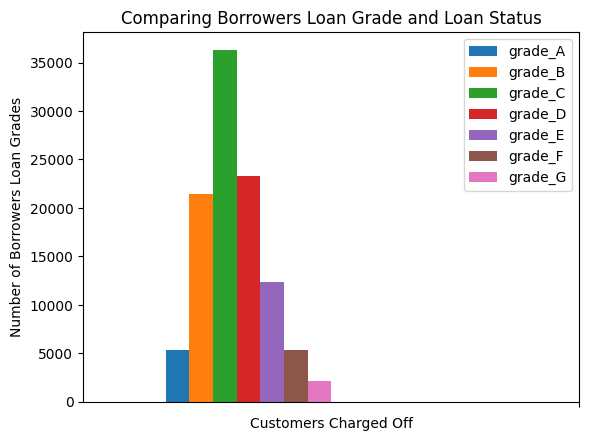

In [132]:
grouped_11 = df_final_data[df_final_data['loan_status'] == 1].groupby('loan_status')[['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G']].sum()

grouped_11.plot.bar()
plt.xlabel('Customers Charged Off')
plt.ylabel("Number of Borrowers Loan Grades")
plt.xticks([1], [''])
plt.title("Comparing Borrowers Loan Grade and Loan Status")
plt.show()

In [133]:
# https://www.opploans.com/oppu/articles/grading-your-credit-score/#:~:text=Grade%20A,everyone%20should%20be%20striving%20for.

In [134]:
Salary_ranges = [0, 25000, 50000, 75000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000, np.inf]
df_final_data['income_bin'] = pd.cut(df_final_data['annual_inc'], bins = Salary_ranges)

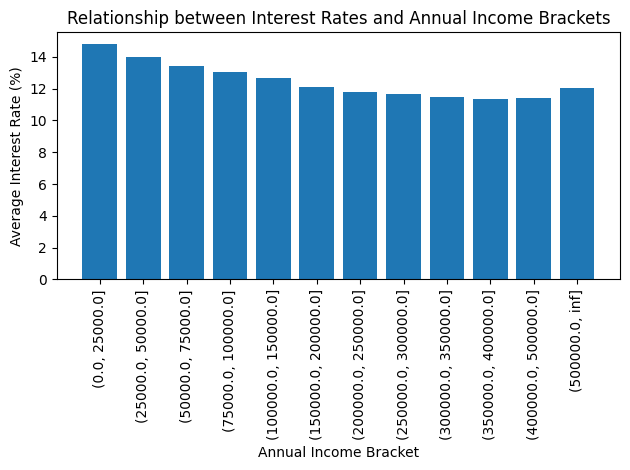

In [135]:
grouped_11 = df_final_data.groupby('income_bin')['int_rate'].mean()

plt.bar(grouped_11.index.astype(str), grouped_11.values)
plt.xticks(rotation=90)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Interest Rate (%)')
plt.title('Relationship between Interest Rates and Annual Income Brackets')
plt.tight_layout()
plt.show()

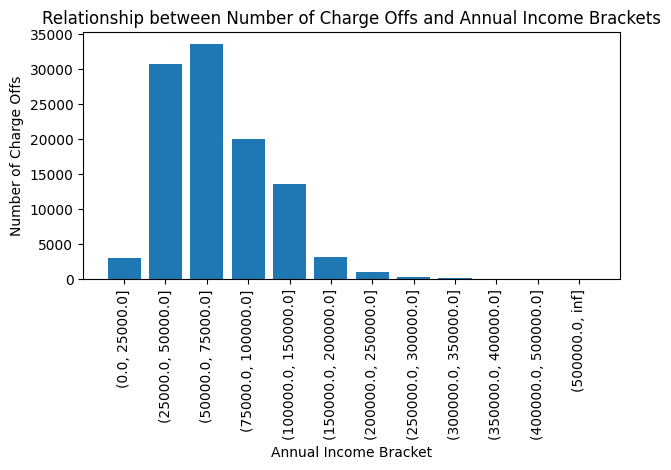

In [136]:
grouped_12 = df_final_data[df_final_data['loan_status']==1].groupby('income_bin')['loan_status'].sum()

plt.bar(grouped_12.index.astype(str), grouped_12.values)
plt.xticks(rotation=90)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Number of Charge Offs')
plt.title('Relationship between Number of Charge Offs and Annual Income Brackets')
plt.tight_layout()
plt.show()

In [137]:
grouped_13 = df_final_data.groupby('loan_status')['installment'].median()
print(grouped_13)

loan_status
0    363.79
1    424.07
Name: installment, dtype: float64


             term__36_months  term__60_months
loan_status                                  
1                      69022            37126


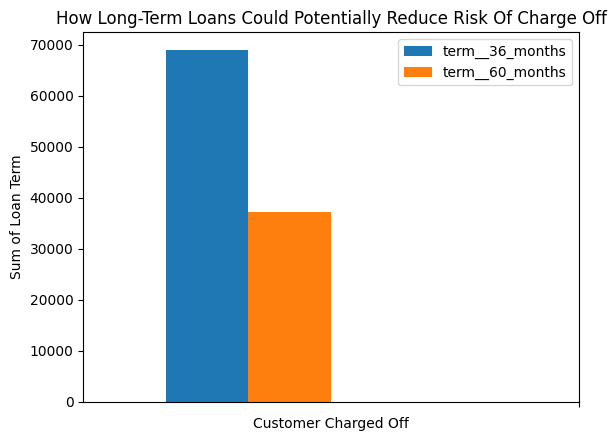

In [138]:
grouped_7 = df_final_data[df_final_data['loan_status']==1].groupby('loan_status')[['term__36_months', 'term__60_months']].sum()
print(grouped_7)

grouped_7.plot.bar()
plt.xlabel('Customer Charged Off')
plt.ylabel('Sum of Loan Term')
plt.xticks([1], [''])
plt.title('How Long-Term Loans Could Potentially Reduce Risk Of Charge Off')
plt.show()

# **Model**

### **The ANN Model**

In [141]:
df_final_data = pd.read_csv('/Users/amirsaccount/Desktop/ConcordiaBootcamp/my_final_dataset.csv')
del df_final_data['Unnamed: 0']
pd.set_option("display.max_columns", None)
df_final_data.head()

,loan_amnt,emp_length,int_rate,installment,funded_amnt,annual_inc,delinq_2yrs,pub_rec,loan_status,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,mort_acc,pub_rec_bankruptcies,fico_range,term__36_months,term__60_months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,dti_Extremely_Risky,dti_Moderate,dti_Safe,dti_Very_Risky,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not_Verified,verification_status_Source_Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,all_util_Extremely_Risky,all_util_Moderate,all_util_Risky,all_util_Safe,revol_util_Extremely_Risky,revol_util_Moderate,revol_util_Risky,revol_util_Safe
0,3600.0,10.0,13.99,123.03,3600.0,55000.0,0.0,0.0,0,4421.723917,0.0,0.0,144904.0,1.0,0.0,677.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,24700.0,10.0,11.99,820.28,24700.0,65000.0,1.0,0.0,0,25679.660000,0.0,0.0,204396.0,4.0,0.0,717.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,20000.0,10.0,10.78,432.66,20000.0,63000.0,0.0,0.0,0,22705.924294,0.0,0.0,189699.0,5.0,0.0,697.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,10400.0,3.0,22.45,289.91,10400.0,104433.0,1.0,0.0,0,11740.500000,0.0,0.0,331730.0,6.0,0.0,697.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,11950.0,4.0,13.44,405.18,11950.0,34000.0,0.0,0.0,0,13708.948530,0.0,0.0,12798.0,0.0,0.0,692.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [142]:
df_final_data = df_final_data.drop(['all_util_Extremely_Risky', 'all_util_Moderate', 'all_util_Risky', 
                                    'all_util_Safe', 'revol_util_Extremely_Risky', 'revol_util_Moderate', 
                                    'revol_util_Risky', 'revol_util_Safe',
                                    "dti_Extremely_Risky","dti_Moderate","dti_Safe","dti_Very_Risky",
                                    "grade_A","grade_B","grade_C","grade_D","grade_E","grade_F","grade_G","funded_amnt"], axis=1)

In [143]:
# I decided to drop these. While I liked the concept. I simply did not have enough information to replicate them on my own when it was time to test the model.pkl
# If I was to create such a model one day I will make sure to have all the tools possible to make my vision alive.

In [144]:
X = df_final_data.drop('loan_status', axis=1)
y = df_final_data['loan_status']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

2023-05-07 14:49:58.960085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [149]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
model = Sequential()
model.add(Dense(64, input_shape=(37,), activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2023-05-07 14:50:42.259871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [151]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
12243/12243 [==============================] - 19s 1ms/step - loss: 0.1791 - accuracy: 0.9714 - val_loss: 0.0895 - val_accuracy: 0.9917
Epoch 2/10
12243/12243 [==============================] - 16s 1ms/step - loss: 0.0952 - accuracy: 0.9848 - val_loss: 0.0752 - val_accuracy: 0.9915
Epoch 3/10
12243/12243 [==============================] - 16s 1ms/step - loss: 0.0861 - accuracy: 0.9867 - val_loss: 0.0715 - val_accuracy: 0.9913
Epoch 4/10
12243/12243 [==============================] - 17s 1ms/step - loss: 0.0827 - accuracy: 0.9872 - val_loss: 0.0749 - val_accuracy: 0.9894
Epoch 5/10
12243/12243 [==============================] - 16s 1ms/step - loss: 0.0811 - accuracy: 0.9877 - val_loss: 0.0685 - val_accuracy: 0.9927
Epoch 6/10
12243/12243 [==============================] - 17s 1ms/step - loss: 0.0793 - accuracy: 0.9880 - val_loss: 0.0676 - val_accuracy: 0.9932
Epoch 7/10
12243/12243 [==============================] - 17s 1ms/step - loss: 0.0792 - accuracy: 0.9883 - val_loss: 0

In [153]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

3061/3061 [==============================] - 3s 842us/step - loss: 0.0700 - accuracy: 0.9913
Test loss: 0.06995581090450287
Test accuracy: 0.9912500381469727


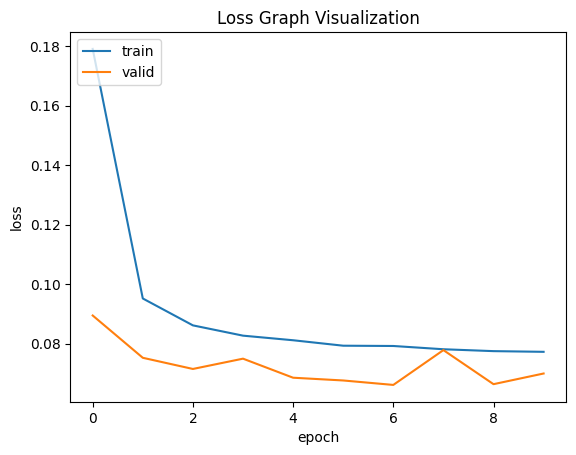

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Graph Visualization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

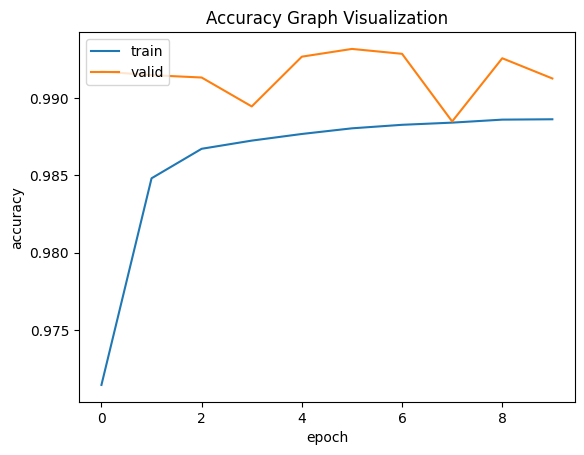

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph Visualization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [156]:
from sklearn.metrics import classification_report
predictions = (model.predict(X_test).astype("int32"))
print(classification_report(y_test,predictions))

3061/3061 [==============================] - 3s 765us/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     76763
           1       1.00      0.82      0.90     21180

    accuracy                           0.96     97943
   macro avg       0.98      0.91      0.94     97943
weighted avg       0.96      0.96      0.96     97943



In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[76763,     0],
       [ 3748, 17432]])

# **Deployment**

### **The Model Tester**

In [159]:
import pickle

In [ ]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [167]:
model = pickle.load(open('/Users/amirsaccount/Desktop/ConcordiaBootcamp/model.pkl', 'rb'))

input_dict = {"loan_amnt":25000.0,"emp_length": 6.0,"int_rate": 9.0,"installment": 450,
              "annual_inc": 45000.0,"delinq_2yrs":0.0,"pub_rec": 0.0, "total_pymnt": 13000,
              "collections_12_mths_ex_med":0.0,"acc_now_delinq":0.0,
              "tot_cur_bal": 250000.0,"mort_acc": 1.0,"pub_rec_bankruptcies": 0.0,"fico_range": 650.0,
              
              "term__36_months":  0,"term__60_months": 1,

              "home_ownership_ANY": 0,"home_ownership_MORTGAGE": 1,"home_ownership_NONE":0,
              "home_ownership_OWN": 0,"home_ownership_RENT": 0,
              
              "verification_status_Not_Verified": 0,
              "verification_status_Source_Verified": 0,"verification_status_Verified": 1,

              "purpose_car": 0,"purpose_credit_card": 0,"purpose_debt_consolidation": 1,
              "purpose_home_improvement":0,"purpose_house": 0,"purpose_major_purchase": 0,
              "purpose_medical": 0,"purpose_moving": 0,"purpose_other":0,
              "purpose_renewable_energy":0,"purpose_small_business":0,"purpose_vacation":0,
              "purpose_wedding":0}


input_features = np.array(list(input_dict.values())).reshape(1, -1)

prediction = model.predict(input_features)

if prediction == 1:
    print("High likelyhood to get charged off by LoanViewer")
else:
    print("Low likelyhood to get charged off by LoanViewer")


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-05-07 14:59:04         2230
metadata.json                                  2023-05-07 14:59:04           64
variables.h5                                   2023-05-07 14:59:04        44400
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...optimizer
......vars
.........0
...vars
1/1 [==============================] - 0s 66ms/step
High likelyhood to get charged off by LoanViewer


In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__, template_folder='/Users/amirsaccount/Desktop/ConcordiaBootcamp/templates')

model = pickle.load(open('/Users/amirsaccount/Desktop/ConcordiaBootcamp/model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict',methods=['POST'])
def predict():

    int_features = [float(x) for x in request.form.values()]
    features = [np.array(int_features)]
    prediction = model.predict(features)

    if prediction == 1:
        return 'High likelyhood to get charged off by LoanViewer'
    return 'Low likelyhood to get charged off by LoanViewer'

    return render_template('index.html')

if __name__ == "__main__":
    app.run(port=5001)